<a href="https://colab.research.google.com/github/victoriaporter58/Computational-techniques-for-recognising-handwritten-digits/blob/master/Optimised_Support_Vector_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Classifier

This file contains the model with optimised parameters. To see how the optimal parameters were identified, see 'Support_Vector_Parameter_Tuning.ipynb'.

Support Vector Classifier tries to find the best hyperplane to separate the different classes by maximizing the distance between the sample points and the hyperplane.The objective here is to find the parameter set-up that provides the most time efficient and accuracte analysis of the MNIST dataset. To do this, the following parameters are being considered:

* ***kernel***: A function which takes two data points as inputs and returns a similarity score. This similarity can be interpreted as a metric of closeness. The nearer the data points are, the higher the similarity.
* ***c***: Controls the trade off between having a smooth decision boundary and classifying the training points correctly. A high value for C tells the algorithm that you care more about classifying all the training points correctly than leaving wiggle room for future data.
* ***gamma***: The kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. A high gamma value will try to exactly fit the training dataset.

**Execution Instructions**:
Note that this notebook will take a significant amount of time to execute fully. See 'Optimised_SVM_Classifier.ipynb' for the final optimised implementation.

* Scroll to 'Downgrade Tensorflow' and run that cell only.
* Restart the runtime: Runtime > Restart runtime.
* Finally, execute the whole script: Runtime > Run all.
* Results and visualisations will appear below the respective cells.

**References**: 
* Code snippet: https://www.codingame.com/playgrounds/37409/handwritten-digit-recognition-using-scikit-learn
* SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* LinearSVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

**Created by**: Victoria Porter

##Downgrade tensorflow
We need to downgrade tensorflow so that we can use it to import the MNIST dataset. Restart the runtime after executing this cell.

In [ ]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 80kB/s 
     |████████████████████████████████| 491kB 24.9MB/s 
     |████████████████████████████████| 3.2MB 37.3MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# import and read the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/server/datasets/MNIST_data/')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/server/datasets/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/server/datasets/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /home/server/datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /home/server/datasets/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as o

In [ ]:
pip freeze > requirements.txt

In [ ]:
cat requirements.txt

absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.4.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==1.4.0
boto==2.49.0
boto3==1.14.20
botocore==1.17.20
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.0
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.1
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.2
distributed==1.25.3
Django==3.0.8
dlib==19.18.0
docopt==0.6.2
docutils==0.15.2
dopamine

##Import and read the MNIST dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# import and read the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/server/datasets/MNIST_data/')

# set-up dataset as numpy array
# seperate the dataset into training (60,000) images & labels and testing (10,000) images & labels
train_images = np.asarray(mnist.train.images)
train_labels = np.asarray(mnist.train.labels)
test_images = np.asarray(mnist.test.images)
test_labels = np.asarray(mnist.test.labels)

# record the expected results for comparison with predictions
expected = test_labels.tolist()

##Train
We are using the optimised method and parameters that were computed in 'Support_Vector_Parameter_Tuning.ipynb' to train the classifier.

In [ ]:
clf = SVC(kernel='poly', C=0.001, gamma=10)

In [ ]:
results = clf.fit(train_images, train_labels)

##Predict
Now that the model has been trained, we want to make predictions on the test data.

In [ ]:
predicted = clf.predict(test_images)

##Evaluate
Now that we have predictions, we want to visualise them.
* ***Accuracy***: The accuracy of our classifier.
* ***Classification report***: This shows us how accurate our classifier is at identifying each class.
* ***Confusion matrix***: This shows us exactly how many samples our classifier got correct/incorrect.

In [ ]:
# see how the model performed on each digit
print("Accuracy: ", accuracy_score(expected, predicted), "\n")
print("Classification Report:")
print(classification_report(expected, predicted), "\n")
print("Confusion Matrix:")
print(confusion_matrix(expected, predicted))

Accuracy:  0.9788 

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 

Confusion Matrix:
[[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1127    2    1    1    1    3    0    0    0]
 [   8    1 1006    0    2    0    3    8    4    0]
 [   0    2    1  9

##Test
Set image_index equal to any value between 1 and 10,000 i.e. the test dataset. Use our trained classifier to make a prediction on a test image.

9


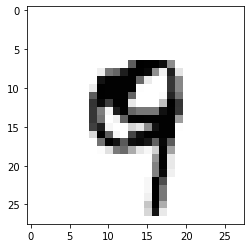

In [ ]:
# select image index from test dataset
image_index = 4444

# reshape the test image so that it fits on screen
# make colourmap greyscale
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')

# make a prediction on the image using the classifier defined and trained above
# (1,-1) means we are using a single sample
pred = clf.predict(test_images[image_index].reshape(1,-1))[0]

# print the classifier's prediction
print(pred)